In [1]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.preprocessing import StandardScaler
import warnings 

from sklearn import datasets
from sklearn import svm

In [2]:
df1 = pd.read_csv('df1.csv' , index_col=0)
df1.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,year_only,number_of_days
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5


In [3]:
df2 = pd.read_csv('df2.csv' , index_col=0)
df2.head()

,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,AK,0.0,0.0,0.0,0.0,0.0,2292.8,0.0
1,AL,6780.6,134.7,148.7,13894.8,26457.6,716.4,2377.1
2,AR,6651.0,4597.8,291.0,10216.5,706.4,0.0,1135.5
3,AZ,1486.5,1879.5,0.0,5358.0,0.0,1327.8,0.0
4,CA,16199.3,18798.3,15131.0,3445.4,0.0,98106.3,0.0


In [4]:
df3 = pd.read_csv('df3.csv' , index_col=0)
df3.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,1980,AK,0,0,0,0,0,0,0
1,1980,AL,1,0,0,0,0,0,0
2,1980,AR,1,1,0,0,0,0,0
3,1980,AZ,0,0,0,0,0,0,0
4,1980,CA,0,0,0,0,0,0,0


# Pre-processing and Training Data, Inflation Rate vs total cost

In [5]:
Inflation_rate_vs_total_cost = pd.read_csv('Inflation_rate_vs_total_cost.csv' , index_col=0)
Inflation_rate_vs_total_cost.head()

,year_only,Inflation rate value,Total CPI-Adjusted Cost (Millions of Dollars)
0,1980,82383.333333,44434.8
1,1981,90933.333333,3392.1
2,1982,96533.333333,14765.9
3,1983,99583.333333,26005.6
4,1984,103933.333333,3124.5


In [6]:
X = Inflation_rate_vs_total_cost.iloc[:, [1,2]]
y = Inflation_rate_vs_total_cost.iloc[:, 0]

In [7]:
X.head()

,Inflation rate value,Total CPI-Adjusted Cost (Millions of Dollars)
0,82383.333333,44434.8
1,90933.333333,3392.1
2,96533.333333,14765.9
3,99583.333333,26005.6
4,103933.333333,3124.5


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

In [9]:
X_train.head()

,Inflation rate value,Total CPI-Adjusted Cost (Millions of Dollars)
5,107600.000000,21922.7
16,160525.000000,16667.1
38,255651.666667,54126.9
22,184000.000000,37403.4
36,245121.000000,383626.4


In [10]:
scaler = StandardScaler().fit(X_train)

In [11]:
print(scaler)

StandardScaler()


In [12]:
scaler.mean_

array([180961.75260417,  69512.03125   ])

In [13]:
scaler.scale_

array([56521.95656663, 80733.52581137])

In [14]:
scaler.transform(X_train)

array([[-1.29793371, -0.58946182],
       [-0.36157192, -0.65455993],
       [ 1.32143186, -0.19056682],
       [ 0.0537534 , -0.39771125],
       [ 1.13512078,  3.89075499],
       [ 0.77777292,  0.32173708],
       [-1.43976649, -0.53888928],
       [ 0.98639981, -0.55346562],
       [ 0.25308597,  2.36520413],
       [ 0.14059281,  0.2527744 ],
       [-0.50561624, -0.43245146],
       [-0.42644347, -0.58070462],
       [-0.0693551 , -0.59722564],
       [-1.00881302, -0.37405565],
       [ 0.65663711, -0.61791592],
       [-0.01937452, -0.53326336],
       [-0.3176362 , -0.40019101],
       [-1.74407302, -0.31061732],
       [-0.88998015, -0.68532287],
       [ 0.99147306, -0.48803184],
       [ 1.97535178,  1.40889881],
       [ 1.04461465, -0.12313511],
       [-0.79252539, -0.6248709 ],
       [ 0.86027331,  1.05698182],
       [-0.15516246, -0.6736821 ],
       [ 1.59247255,  1.11920751],
       [-0.64553237, -0.06910055],
       [-1.59280437, -0.81898976],
       [ 1.24089383,

In [15]:
X_train_scaled = scaler.transform(X_train)

In [16]:
print(X_train_scaled.mean(axis=0))

[8.32667268e-17 2.77555756e-17]


In [17]:
print(X_train_scaled.std(axis=0))

[1. 1.]


In [18]:
scaler = StandardScaler().fit(X_test)

In [19]:
scaler.mean_

array([188472.15151515,  39560.37272727])

In [20]:
scaler.scale_

array([61143.73566333, 35441.47201047])

In [21]:
scaler.transform(X_test)

array([[-0.78771468,  1.08110993],
       [ 0.42674061, -0.57231462],
       [ 0.21402326, -0.42403354],
       [ 0.72745962, -0.22966238],
       [-0.65823835, -0.66149828],
       [ 0.30865002, -0.59763242],
       [-1.38262436, -1.02805755],
       [ 1.8623115 ,  1.37273721],
       [ 1.15103258,  2.20209892],
       [-0.35798955, -0.44315802],
       [-1.50365066, -0.69958925]])

In [22]:
X_test_scaled = scaler.transform(X_test)

In [23]:
print(X_test_scaled)

[[-0.78771468  1.08110993]
 [ 0.42674061 -0.57231462]
 [ 0.21402326 -0.42403354]
 [ 0.72745962 -0.22966238]
 [-0.65823835 -0.66149828]
 [ 0.30865002 -0.59763242]
 [-1.38262436 -1.02805755]
 [ 1.8623115   1.37273721]
 [ 1.15103258  2.20209892]
 [-0.35798955 -0.44315802]
 [-1.50365066 -0.69958925]]


In [24]:
rModel = linear_model.LinearRegression()

In [25]:
rModel.fit(X_train, y_train)

LinearRegression()

In [26]:
rModel.score(X_train, y_train)

0.9939898379458569

In [27]:
y_pred = rModel.predict(X_test)

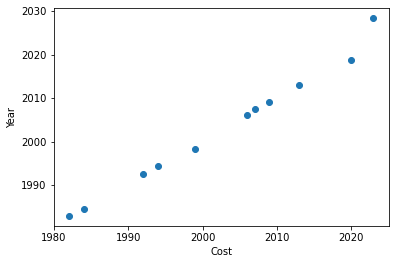

In [28]:
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('Cost')
_ = plt.ylabel('Year')

In [29]:
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [31]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [32]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [33]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

In [34]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [35]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [37]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scores = cross_validate(clf, X, y,
                        scoring='precision_macro', cv=5,
                        return_estimator=True)
sorted(scores.keys())

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [38]:
from sklearn.metrics import make_scorer
scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(clf, X, y, scoring=scoring,
                        cv=5, return_train_score=True)
sorted(scores.keys())
scores['train_rec_macro']

array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])

In [39]:
scores = cross_validate(clf, X, y,
                        scoring='precision_macro', cv=5,
                        return_estimator=True)
sorted(scores.keys())

['estimator', 'fit_time', 'score_time', 'test_score']

In [40]:
predict = cross_predict(clf, X, y,
                        scoring='precision_macro', cv=5,
                        return_estimator=True)
sorted(predict.keys())

NameError: name 'cross_predict' is not defined

# 
X_Train -> fit and transform....
X_Test -> use the same scaler object and call only transform
